In [5]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import os
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold

In [6]:
# Binding
import pandas as pd
from sklearn.model_selection import KFold
import os

nek_5 = ["5"]

for nek in nek_5:
    # Get training data
    data_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek 
    file_name = "NEK" + nek + "_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv"
    file_path = os.path.join(data_path, file_name)

    # Check if the file exists before attempting to read
    if os.path.isfile(file_path):
        binding_df = pd.read_csv(file_path)
        print(binding_df.shape)

        # Continue with the rest of your processing here
        print(binding_df.active.value_counts())
        num_gap = (binding_df.loc[binding_df['active']==0].shape[0]) - (binding_df.loc[binding_df['active']==1].shape[0])
        print(num_gap)
        num_minority = binding_df.loc[binding_df['active']==1].shape[0]
        print(num_minority)

    # Separate majority and minority classes
        df_majority = binding_df[binding_df['active']==0]
        df_minority = binding_df[binding_df['active']==1]

        #=======================
        # Create 5-fold splits
        #=======================
        kf = KFold(n_splits=5, shuffle=True, random_state=0)

        # majority
        for i, (_, v_ind) in enumerate(kf.split(df_majority)):
            df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"

        # minority
        for i, (_, v_ind) in enumerate(kf.split(df_minority)):
            df_minority.loc[df_minority.index[v_ind], 'fold'] = f"fold{i+1}"


        print(df_majority['fold'].value_counts())
        print(df_minority['fold'].value_counts())


        # Concat
        all_fold_df = pd.concat([df_majority,df_minority])
        print(all_fold_df.shape)
        print(all_fold_df.active.value_counts())


        # Save to file
        split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
            
            # Ensure this directory exists
        os.makedirs(split_path, exist_ok=True)

        all_fold_df.to_csv(os.path.join(split_path, file_name), index=False)
    else:
        print(f"File not found: {file_path}")

(1237, 310)
active
0    1140
1      97
Name: count, dtype: int64
1043
97
fold
fold3    228
fold1    228
fold2    228
fold4    228
fold5    228
Name: count, dtype: int64
fold
fold1    20
fold2    20
fold3    19
fold5    19
fold4    19
Name: count, dtype: int64
(1237, 310)
active
0    1140
1      97
Name: count, dtype: int64


In [7]:
# Separate majority and minority classes
df_majority = binding_df[binding_df['active']==0]
df_minority = binding_df[binding_df['active']==1]

print("Shape of the majority: ",df_majority.shape)
df_minority

Shape of the majority:  (1140, 310)


,compound_id,base_rdkit_smiles,active,ASA+_per_atom,ASA-,ASA_H_per_atom,ASA_P,ASA_per_atom,BCUT_PEOE_0,BCUT_PEOE_1,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol_per_atom,zagreb_per_atom,fold
1140,kdb_2255,Cc1cnc(Nc2ccc(C(=O)N3CCC([NH+]4CCCC4)CC3)cc2)n...,1,7.129596,221.71678,9.593643,59.627785,10.470523,-2.799085,-0.627536,...,140.500,32.625,14.375,4.875,0.250,0.00,4863,0.838235,2.911765,fold3
1141,kdb_2207,COc1cc2ncn(-c3cc(O[C@H](C)c4ccccc4Cl)c(C(N)=O)...,1,7.972049,237.02055,9.733202,147.201740,12.619510,-2.441789,-0.603292,...,150.250,27.125,10.625,3.125,0.375,0.00,2744,1.019608,3.254902,fold3
1142,kdb_2176,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,1,7.610593,294.18137,10.628470,113.108750,12.513616,-2.578289,-0.647668,...,182.625,36.375,15.375,5.625,0.875,0.00,4403,0.750000,2.866667,fold1
1143,kdb_2069,Nc1ncnc2c1c(I)cn2C1OC(CO)C(O)C1O,1,8.871621,191.12732,7.302865,249.117520,14.851882,-2.511235,-0.645868,...,152.125,37.000,11.125,2.750,0.250,0.00,742,1.060606,3.333333,fold2
1144,kdb_2113,CC(C)(C)OC(=O)NCc1cccc(Nc2ncc(Br)c(NCCCNC(=O)C...,1,6.026658,223.75838,8.361651,175.818510,10.985808,-2.771648,-0.578855,...,155.875,47.875,19.125,6.625,0.500,0.00,4500,0.656716,2.537313,fold3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,kdb_2114,CCCC(=O)Nc1cccc(Nc2ncc(Br)c(NCCCNC(=O)C3CCC3)n...,1,5.159087,223.60912,8.378988,176.980530,11.328663,-2.771648,-0.604474,...,192.875,65.250,32.625,14.250,6.750,2.75,3426,0.683333,2.533333,fold2
1233,kdb_2254,O=C(NCCCN1CCOCC1)c1ccc(Nc2nccc(-c3cc4ccccc4s3)...,1,7.156522,198.34747,8.484256,119.006930,10.403723,-2.767015,-0.615718,...,159.750,32.500,11.500,3.750,0.000,0.00,4459,0.790323,2.870968,fold5
1234,kdb_2767,C[C@@H](Oc1cc(-n2cnc3ccc(-c4ccncc4)cc32)sc1C(N...,1,7.637708,289.85028,10.010394,170.801560,13.295039,-2.441789,-0.622655,...,149.750,25.750,9.625,2.500,0.250,0.00,3294,1.038462,3.461538,fold4
1235,kdb_2256,O=C(c1ccc(Nc2ncc(C3CC3)c(-c3cc4ccccc4s3)n2)cc1...,1,7.167467,212.28886,8.345709,128.757130,10.134003,-2.799085,-0.653614,...,165.625,36.250,14.750,4.250,0.000,0.00,5514,0.847222,2.972222,fold4


In [8]:
# Create 5-fold splits
# Use random_state=0
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# majority
for i, (_, v_ind) in enumerate(kf.split(df_majority)):
    df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"
    
df_majority['fold'].value_counts()

fold
fold3    228
fold1    228
fold2    228
fold4    228
fold5    228
Name: count, dtype: int64

In [9]:
# Binding
method = "binding"
nek_3 = ["3"]
foldAll = ["fold1","fold2","fold3","fold4","fold5"]

for nek in nek_3:
    # Get training data
    split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
    random_df = pd.read_csv(split_path+"/NEK"+nek+"_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv")
    random_df.head

    moe_columns = random_df.columns[3:]
    moe_columns = moe_columns[:-1]
    moe_columns

    # Use the fold 0 as the test set, fold 1,2,3,4 as the train set
    for fold in foldAll:
        test_moe_df = random_df.loc[random_df['fold'] == fold]
        train_moe_df = random_df.loc[random_df['fold'] != fold]
        print(test_moe_df.shape)
        print(train_moe_df.shape)

        test_x_df = test_moe_df[moe_columns]
        test_y_df = test_moe_df['active']
        print(test_x_df)
        print(test_y_df.value_counts())

        train_x_df = train_moe_df[moe_columns]
        train_y_df = train_moe_df['active']
        print(train_x_df.shape)
        print(train_y_df.value_counts())


        # Save to file
        uq_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
        #uq_path = "/p/lustre2/fan4/myGPyTorch/classification_NEK/data/"

        train_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainX.csv", index=False)
        train_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainY.csv", index=False)
        test_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testX.csv", index=False)
        test_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testY.csv", index=False)





(282, 310)
(1122, 310)
      ASA+_per_atom       ASA-  ASA_H_per_atom      ASA_P  ASA_per_atom  \
1         10.215013  142.21526        6.836120  244.47214     15.890644   
5          7.736764  220.71700        7.970176  205.31177     11.080960   
8          8.211856  304.34698        8.814355  271.20950     13.745438   
9          8.901980  195.95447        8.445429  222.74628     13.395346   
14         7.612832  287.15073        9.292597  194.76367     12.833755   
...             ...        ...             ...        ...           ...   
1380      10.206247  174.56108       11.438849  117.39546     13.786759   
1384       8.224840  221.81551       10.469413  138.76630     14.219854   
1394       8.642949  161.90437        8.153549  186.68533     12.940353   
1396       7.236550  241.08192        7.003955  254.33978     11.466057   
1397       8.511531  277.76974        8.521127  280.75598     13.279703   

      BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
1       -2.19415

In [10]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# check version number
import imblearn
print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE


# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

imblearn version:  0.12.0


In [11]:
# confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# from sklearn 0.19.2 documentation:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
# PCA

x_df = pd.concat([train_x_df, test_x_df])

# PCA
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(x_df)
Scaled_data=scaling.transform(x_df)
train_scaled_data = scaling.transform(train_x_df)
test_scaled_data = scaling.transform(test_x_df)

# Set the n_components=3
# 95% variance
principal=PCA(n_components=0.95)
principal.fit(Scaled_data)
pca_train_x_df=principal.transform(train_scaled_data)
pca_test_x_df=principal.transform(test_scaled_data)

print(pca_train_x_df.shape)
print(pca_test_x_df.shape)



(1124, 67)
(280, 67)


In [13]:
# SMOTE

# SMOTE: Adjust imbalanced training data

# transform the dataset
oversample = SMOTE()
new_train_x_df, new_train_y_df = oversample.fit_resample(pca_train_x_df, train_y_df)



In [14]:
# Transform data to PyTorch tensors

# PCA then SMOTE
train_x_temp = new_train_x_df.astype("long")
train_y_temp = new_train_y_df.to_numpy().astype("long")

# PCA
test_x_temp = pca_test_x_df.astype("long")


test_y_temp = test_y_df.to_numpy().astype("long")

train_x = torch.from_numpy(train_x_temp)
train_y = torch.from_numpy(train_y_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y_temp)


print(train_x.shape)
print(train_y.shape)

torch.Size([2118, 67])
torch.Size([2118])


In [15]:
# Construct a GP classification model

from gpytorch.models import ExactGP
from gpytorch.likelihoods import DirichletClassificationLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel

# We will use the simplest form of GP model, exact inference
class DirichletGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood, num_classes):
        super(DirichletGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean(batch_shape=torch.Size((num_classes,)))
        self.covar_module = ScaleKernel(
            RBFKernel(batch_shape=torch.Size((num_classes,))),
            batch_shape=torch.Size((num_classes,)),
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
# we let the DirichletClassificationLikelihood compute the targets for us
likelihood = DirichletClassificationLikelihood(train_y, learn_additional_noise=True)
model = DirichletGPModel(train_x, likelihood.transformed_targets, likelihood, num_classes=likelihood.num_classes)


In [16]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 300


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, likelihood.transformed_targets).sum()
    loss.backward()
    if i % 5 == 0:
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            model.covar_module.base_kernel.lengthscale.mean().item(),
            model.likelihood.second_noise_covar.noise.mean().item()
        ))
    optimizer.step()

Iter 1/300 - Loss: 7.025   lengthscale: 0.693   noise: 0.693
Iter 6/300 - Loss: 6.270   lengthscale: 0.973   noise: 0.971
Iter 11/300 - Loss: 5.707   lengthscale: 1.319   noise: 1.283
Iter 16/300 - Loss: 5.288   lengthscale: 1.727   noise: 1.572
Iter 21/300 - Loss: 4.982   lengthscale: 2.197   noise: 1.767
Iter 26/300 - Loss: 4.757   lengthscale: 2.707   noise: 1.829
Iter 31/300 - Loss: 4.587   lengthscale: 3.228   noise: 1.758
Iter 36/300 - Loss: 4.429   lengthscale: 3.740   noise: 1.577
Iter 41/300 - Loss: 4.285   lengthscale: 4.232   noise: 1.319
Iter 46/300 - Loss: 4.148   lengthscale: 4.692   noise: 1.027
Iter 51/300 - Loss: 4.031   lengthscale: 5.101   noise: 0.745
Iter 56/300 - Loss: 3.959   lengthscale: 5.444   noise: 0.509
Iter 61/300 - Loss: 3.872   lengthscale: 5.720   noise: 0.336
Iter 66/300 - Loss: 3.831   lengthscale: 5.932   noise: 0.223
Iter 71/300 - Loss: 3.798   lengthscale: 6.089   noise: 0.153
Iter 76/300 - Loss: 3.764   lengthscale: 6.199   noise: 0.111
Iter 81/30

In [17]:
# Make predictions with the model

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(train_x)
    pred_means = test_dist.loc
    observed_pred = likelihood(model(train_x))

print(pred_means.numpy().shape)
print(pred_means.max(0)[1])

/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


(2, 2118)
tensor([0, 0, 0,  ..., 1, 1, 1])


Confusion matrix, without normalization
[[1057    2]
 [   0 1059]]


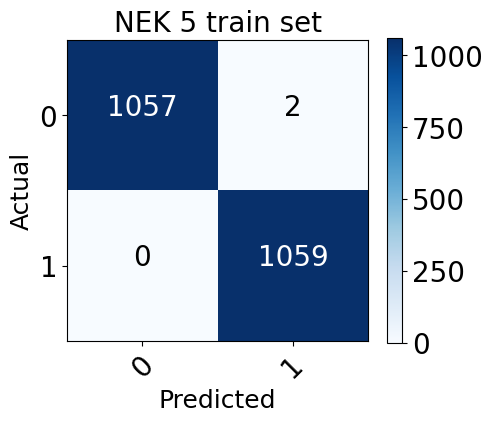

In [18]:
train_prediction = model(train_x).loc.max(0)[1].numpy()
y_true = new_train_y_df.values
y_pred = train_prediction
train_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK 5 train set",fontsize=20)
plot_confusion_matrix(train_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);

In [19]:
# Make predictions with the model
# Prediction on the test set

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(test_x)
    test_pred_means = test_dist.loc
    test_pred = likelihood(model(test_x))
    
print(test_pred_means.numpy().shape)
print(test_pred_means.max(0)[1])

(2, 280)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])


In [20]:
test_prediction = model(test_x).loc.max(0)[1].numpy()
print(test_prediction.shape)
test_prediction

(280,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

Confusion matrix, without normalization
[[261   3]
 [ 12   4]]


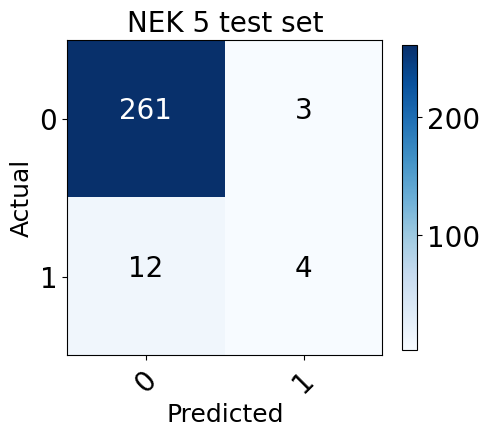

In [21]:
y_true = test_y_df.values
y_pred = test_prediction
test_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK 5 test set",fontsize=20)
plot_confusion_matrix(test_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);


In [22]:
lower, upper = observed_pred.confidence_region()
upper

tensor([[ 2.8271,  3.1206,  3.1863,  ..., -1.5637, -0.8467, -1.4475],
        [-0.6801, -0.3464, -0.6539,  ...,  1.9597,  2.6087,  1.9930]])

In [23]:
observed_pred.mean.numpy()


array([[-0.4640975 , -0.48146474, -0.42617142, ..., -6.2119684 ,
        -5.80402   , -6.004324  ],
       [-5.8908734 , -5.8894033 , -6.258606  , ..., -0.40523577,
        -0.3090868 , -0.44400835]], dtype=float32)

In [24]:
print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

(2, 2118)


array([[2.707926 , 3.243657 , 3.2625723, ..., 5.401547 , 6.1436615,
        5.191173 ],
       [6.7881594, 7.6813045, 7.853319 , ..., 1.3982036, 2.128357 ,
        1.4846916]], dtype=float32)

In [25]:
print(pred_means.numpy())

[[-0.4640975  -0.48146474 -0.42617142 ... -6.2119684  -5.80402
  -6.004324  ]
 [-5.8908734  -5.8894033  -6.258606   ... -0.40523577 -0.3090868
  -0.44400835]]


In [26]:
# Draw samples from the posterior.
pred_samples = test_dist.sample(torch.Size((256,))).exp()
probabilities = (pred_samples / pred_samples.sum(-2, keepdim=True)).mean(0)
probabilities

tensor([[0.9404, 0.9950, 0.9083, 0.9819, 0.8844, 0.9871, 0.9799, 0.9935, 0.9265,
         0.9297, 0.9894, 0.9418, 0.9511, 0.9692, 0.9663, 0.8815, 0.9621, 0.9836,
         0.9398, 0.9797, 0.8760, 0.9884, 0.9881, 0.9165, 0.9868, 0.9779, 0.8436,
         0.9174, 0.9624, 0.9727, 0.7221, 0.9872, 0.7506, 0.9922, 0.9402, 0.9752,
         0.9616, 0.9881, 0.9868, 0.7931, 0.9902, 0.6772, 0.9267, 0.9288, 0.9572,
         0.9845, 0.9889, 0.9679, 0.9729, 0.9777, 0.9750, 0.5189, 0.8749, 0.9561,
         0.9003, 0.9843, 0.9845, 0.9630, 0.8982, 0.9897, 0.9383, 0.9879, 0.9847,
         0.8541, 0.7938, 0.9430, 0.9416, 0.9781, 0.5062, 0.9809, 0.9022, 0.9857,
         0.8421, 0.9839, 0.9813, 0.9724, 0.9789, 0.8436, 0.9010, 0.9874, 0.9548,
         0.6069, 0.9839, 0.9856, 0.9831, 0.9559, 0.9902, 0.9776, 0.2293, 0.9628,
         0.9902, 0.9810, 0.8634, 0.5490, 0.9772, 0.5012, 0.9870, 0.9850, 0.9959,
         0.3554, 0.9952, 0.7228, 0.9718, 0.9250, 0.9579, 0.9856, 0.9905, 0.9738,
         0.8171, 0.9826, 0.8

In [27]:
test_pred.mean.numpy()

array([[-8.0792403e-01,  3.7510261e-02, -1.2966280e+00, -5.4026639e-01,
        -1.2550347e+00, -2.8873748e-01, -3.7643355e-01, -1.0333148e-01,
        -1.1656166e+00, -9.2938650e-01, -9.8202601e-02, -1.0956783e+00,
        -7.1416324e-01, -3.8876233e-01, -5.0280339e-01, -1.4143969e+00,
        -4.8646796e-01, -2.7538848e-01, -9.3491441e-01, -2.3696174e-01,
        -7.7708876e-01, -2.1839020e-01, -1.3324395e-01, -1.1066184e+00,
        -3.0877519e-01, -3.6281186e-01, -1.6383191e+00, -6.4223373e-01,
        -7.9851878e-01, -3.1171533e-01, -1.9629885e+00, -3.8597718e-02,
        -2.3172069e+00, -1.6619198e-01, -4.6368527e-01, -4.5027202e-01,
        -6.3886523e-01, -3.8635027e-01, -1.3589470e-01, -1.8705109e+00,
        -2.4606590e-01, -2.2163601e+00, -8.2040268e-01, -1.1411501e+00,
        -7.0675278e-01, -1.8327801e-01, -8.3914548e-03, -4.5492411e-01,
        -3.9785308e-01, -4.7680825e-01, -3.5845071e-01, -2.6728477e+00,
        -1.3029881e+00, -8.0266201e-01, -1.5534092e+00, -3.34005

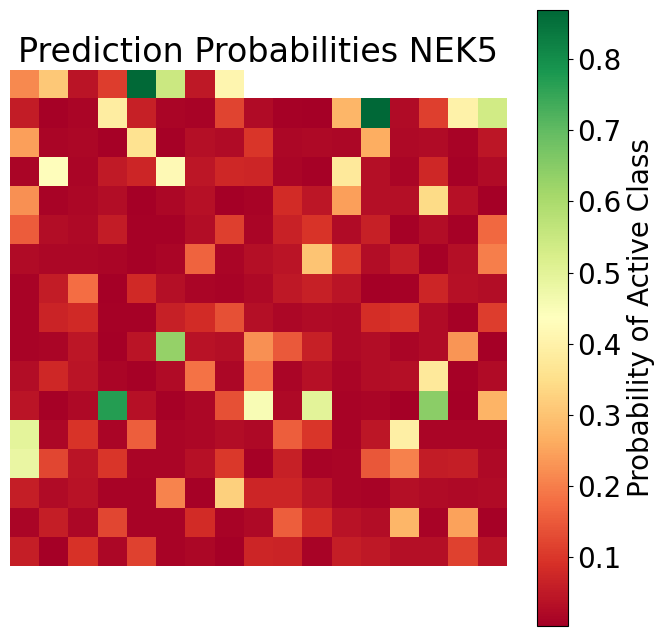

In [28]:
import matplotlib.pyplot as plt
import numpy as np

probabilities_np = probabilities.numpy()

active_probabilities = probabilities_np[1, :]


num_samples = active_probabilities.shape[0]
side_length = int(np.ceil(np.sqrt(num_samples)))  # Calculate the side length of the grid

# Create a 2D array filled with NaNs (to be ignored in the plot)
grid_data = np.full((side_length, side_length), np.nan)

# Fill the grid with the active probabilities
# Flatten the grid (if needed) and assign probabilities (ensures alignment even if not a perfect square)
grid_data.flat[:num_samples] = active_probabilities

# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(grid_data, cmap='RdYlGn', origin='lower', aspect='equal')
plt.colorbar(label='Probability of Active Class')
plt.title('Prediction Probabilities NEK5')
plt.axis('off')  # Turn off the axis for a clean look

plt.show()

NameError: name 'cm' is not defined

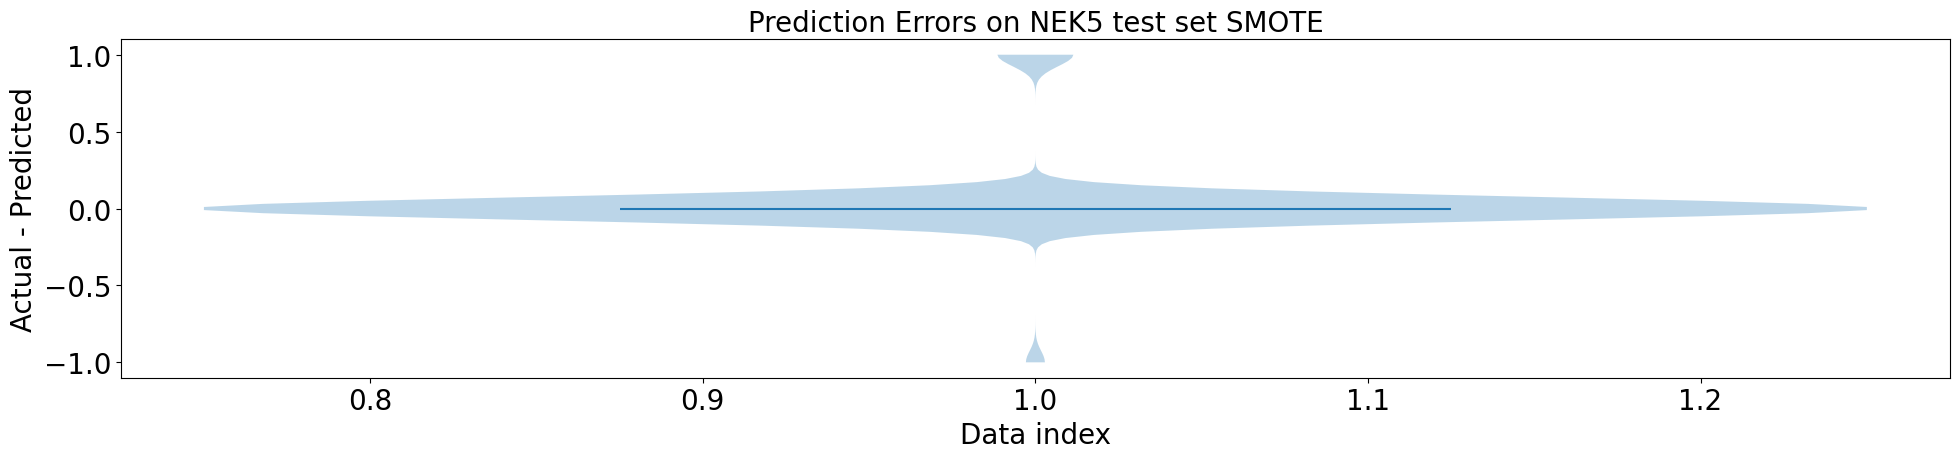

In [29]:
fig = plt.figure(figsize=(20, 5))

plt.title("Prediction Errors on NEK5 test set SMOTE", fontsize=20)


# Plot the violin plot with modified widths
plt.violinplot((y_true - test_prediction), showmeans=False, showextrema=False, showmedians=True)

plt.xlabel('Data index')
plt.ylabel('Actual - Predicted')
fig.tight_layout()

# Add colorbar to show the mapping of variance
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(vmin=var_min, vmax=var_max))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Test Prediction Variance')

plt.show()
